In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./gapminder.csv')
df.head()

,Country,Year,life,population,child_mortality,gdp,region
0,Afghanistan,1964,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,35.674,11411022.0,318.1,1187.0,South Asia


In [8]:
df.columns = ['Country', 'Year', 'Life_Exp', 'Population', 'Child_Mortality', 'GDP', 'Region']
df.head()

,Country,Year,Life_Exp,Population,Child_Mortality,GDP,Region
0,Afghanistan,1964,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,35.674,11411022.0,318.1,1187.0,South Asia


## Line Plot
*When you have a time scale along the **horizontal axis**, the line plot is your friend.*

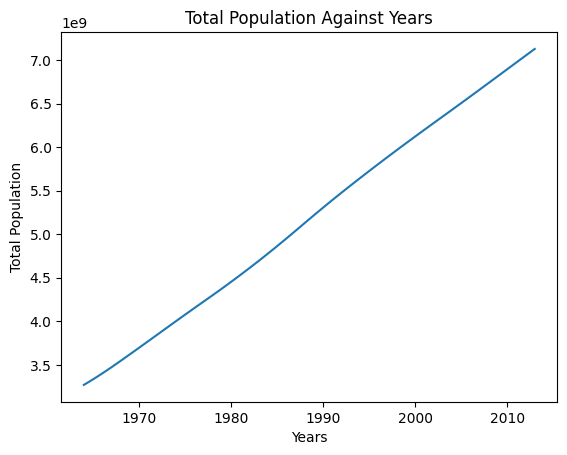

In [16]:
df_population = df.groupby(['Year'])['Population'].sum().reset_index()
df_population.head()
plt.plot(df_population['Year'], df_population['Population'])
plt.title('Total Population Against Years')
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.show()

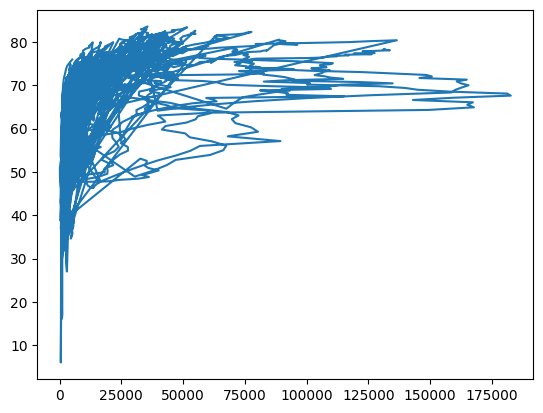

In [17]:
plt.plot(df['GDP'], df['Life_Exp'])
plt.show()

#### **Note**: *When you're trying to assess if there's a correlation between two variables, for example, the **scatter plot** is the better choice.*

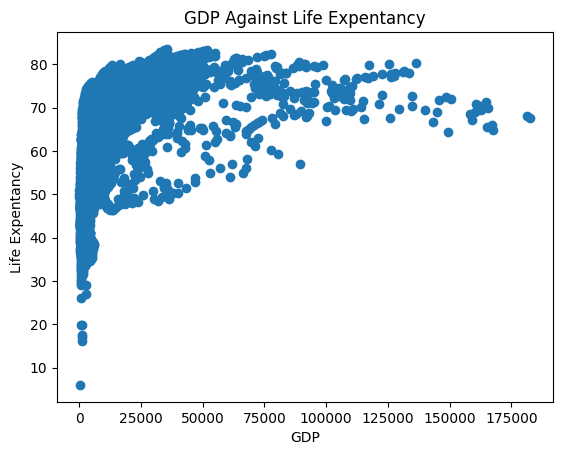

In [27]:
plt.scatter(df['GDP'], df['Life_Exp'])
plt.title('GDP Against Life Expentancy')
plt.xlabel('GDP')
plt.ylabel('Life Expentancy')
plt.show()

#### Since we cant get any insights in this, we will **transform GDP on x-axis to logarithmic scale!**

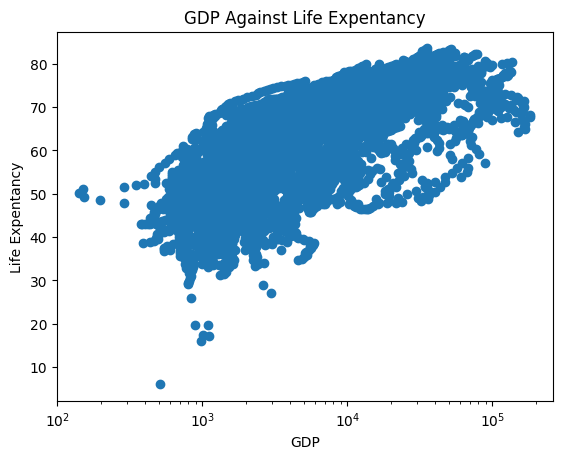

In [28]:
plt.scatter(df['GDP'], df['Life_Exp'])
plt.title('GDP Against Life Expentancy')
plt.xlabel('GDP')
plt.ylabel('Life Expentancy')
plt.xscale('log')
plt.show()


### Positive Correlation!

# Lets try this again but only focusing on a specific year, say 2012!

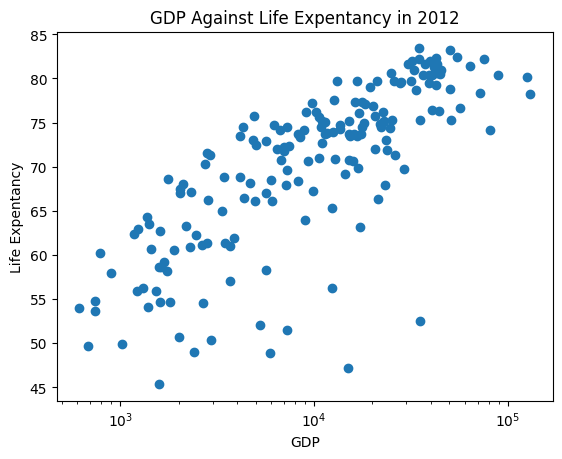

In [31]:
df_2012 = df[df['Year'] == 2012]
plt.scatter(df_2012['GDP'], df_2012['Life_Exp'])
plt.title('GDP Against Life Expentancy in 2012')
plt.xlabel('GDP')
plt.ylabel('Life Expentancy')
plt.xscale('log')
plt.show()

A logarithmic scale is a nonlinear scale used when there is a large range of quantities. They are also used in slide rules for multiplying or dividing numbers by adding or subtracting lengths on the scales.

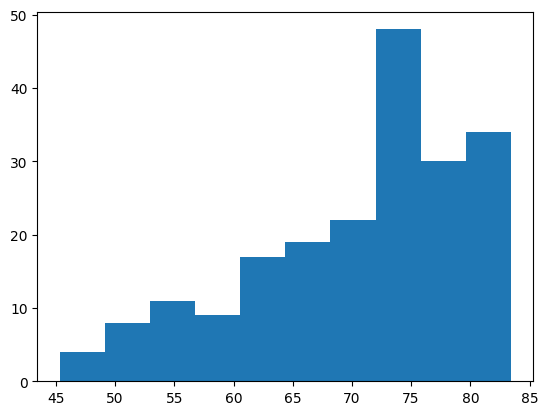

In [34]:
# Create histogram of life_exp data
plt.hist(df_2012['Life_Exp'])

# Display histogram
plt.show()


By default the number of bin are 10.

**The number of bins is pretty important. Too few bins will oversimplify reality and won't show you the details. Too many bins will overcomplicate reality and won't show the bigger picture.**

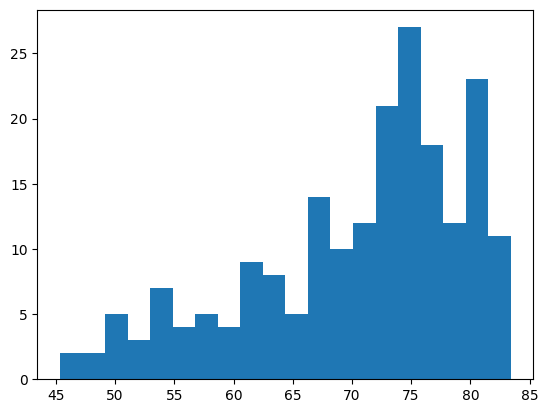

In [38]:
plt.clf()
plt.hist(df_2012['Life_Exp'], bins=20)
plt.show()

## Subplotting
#### **Note**: *plt.subplot(Row, Columns, Positions)*

In [41]:
df_2000 = df[df['Year'] == 2000]
df_2004 = df[df['Year'] == 2004]
df_2008 = df[df['Year'] == 2008]
#2012 already stored


(array([ 2.,  2.,  5.,  3.,  7.,  4.,  5.,  4.,  9.,  8.,  5., 14., 10.,
        12., 21., 27., 18., 12., 23., 11.]),
 array([45.338, 47.242, 49.146, 51.05 , 52.954, 54.858, 56.762, 58.666,
        60.57 , 62.474, 64.378, 66.282, 68.186, 70.09 , 71.994, 73.898,
        75.802, 77.706, 79.61 , 81.514, 83.418]),
 <BarContainer object of 20 artists>)

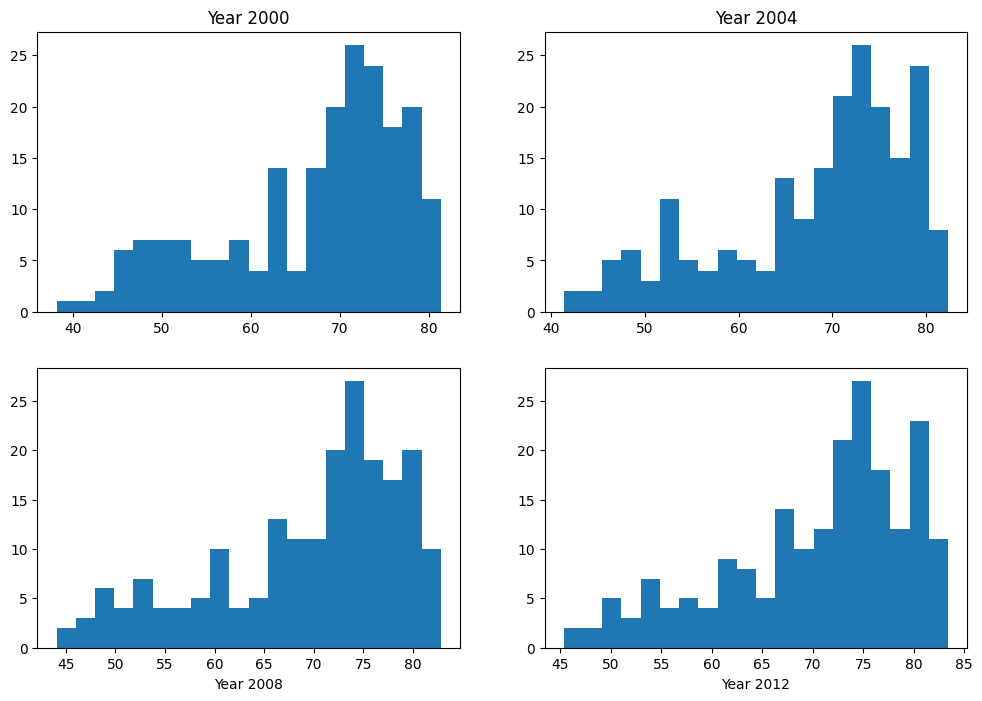

In [68]:
plt.figure(figsize=(12, 8))  # Figure Size 12x8 Dimensions


plt.subplot(2,2,1)
#subplot 1
plt.title('Year 2000')
plt.hist(df_2000['Life_Exp'], bins=20)

plt.subplot(2, 2, 2)
#subplot 2
plt.title('Year 2004')
plt.hist(df_2004['Life_Exp'], bins=20)

plt.subplot(2, 2, 3)
#subplot 3
plt.xlabel('Year 2008')
plt.hist(df_2008['Life_Exp'], bins=20)

plt.subplot(2, 2, 4)
#subplot 4
plt.xlabel('Year 2012')
plt.hist(df_2012['Life_Exp'], bins=20)



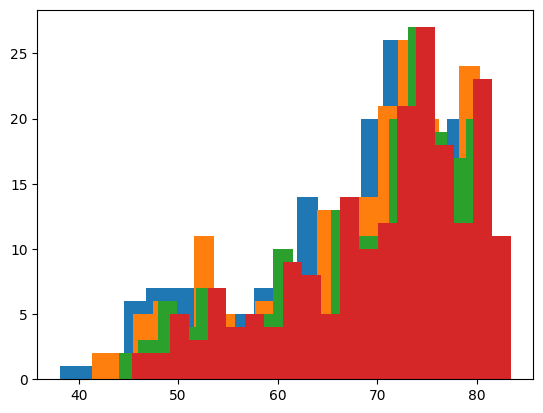

In [51]:
plt.hist(df_2000['Life_Exp'], bins=20)#blue
plt.hist(df_2004['Life_Exp'], bins=20)#orange
plt.hist(df_2008['Life_Exp'], bins=20)#green
plt.hist(df_2012['Life_Exp'], bins=20)#red

plt.show()

In [53]:
pop_data_2012 = df_2012['Population']/1000000
pop_data_2012

48       33.397058
98        3.227373
148      36.485828
198      20.162517
248       0.090510
           ...    
9899      4.270791
9949      0.566613
9999     25.569263
10049    13.883577
10099    13.013678
Name: Population, Length: 202, dtype: float64

In [55]:
df_2012.head()

,Country,Year,Life_Exp,Population,Child_Mortality,GDP,Region
48,Afghanistan,2012,60.524,33397058.0,99.5,1893.0,South Asia
98,Albania,2012,77.185,3227373.0,15.5,9811.0,Europe & Central Asia
148,Algeria,2012,70.874,36485828.0,25.8,12779.0,Middle East & North Africa
198,Angola,2012,51.498,20162517.0,172.2,7230.0,Sub-Saharan Africa
248,Antigua and Barbuda,2012,75.783,90510.0,9.1,20577.0,America


Assigning Colors according to regions

In [56]:
#colors according to region
col = {'South Asia': 'red', 'Europe & Central Asia': 'green', 'Middle East & North Africa': 'blue', 'Sub-Saharan Africa': 'yellow',
       'America': 'orange', 'East Asia & Pacific': 'black'}


Using .map() function to map region against thier corresponding color

In [57]:
#Right now just focusing on 2012 dataset
df_2012['Color'] = df_2012['Region'].map(col)
df_2012.head()

/tmp/ipykernel_1060870/2333010649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Color'] = df_2012['Region'].map(col)


,Country,Year,Life_Exp,Population,Child_Mortality,GDP,Region,Color
48,Afghanistan,2012,60.524,33397058.0,99.5,1893.0,South Asia,red
98,Albania,2012,77.185,3227373.0,15.5,9811.0,Europe & Central Asia,green
148,Algeria,2012,70.874,36485828.0,25.8,12779.0,Middle East & North Africa,blue
198,Angola,2012,51.498,20162517.0,172.2,7230.0,Sub-Saharan Africa,yellow
248,Antigua and Barbuda,2012,75.783,90510.0,9.1,20577.0,America,orange


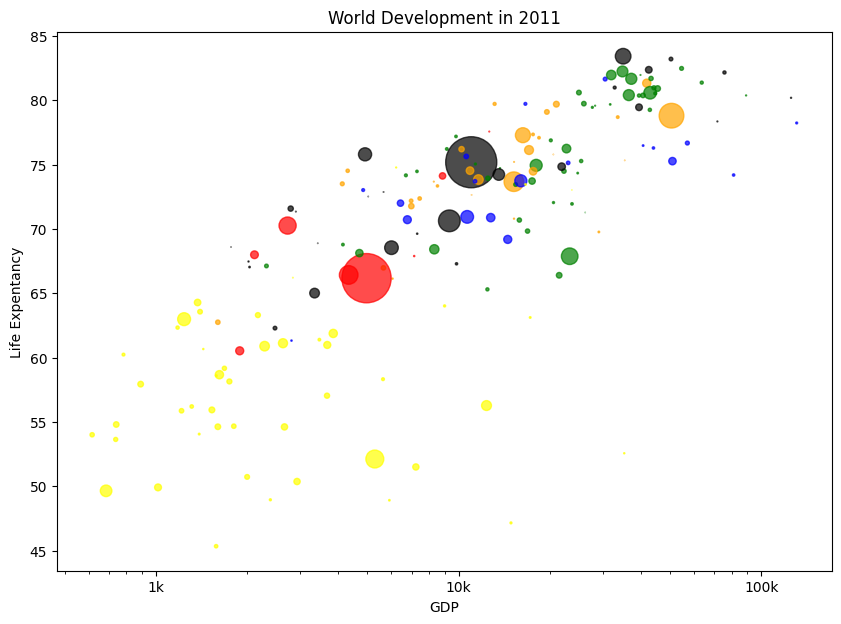

In [82]:

plt.figure(figsize=(10, 7))#Figure Size 10x7 Dimensions


plt.scatter(df_2012['GDP'], df_2012['Life_Exp'], s=pop_data_2012, c=df_2012['Color'], alpha=0.7)#alpha = 1 --> Full Transparency and vice versa
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Life Expentancy')
plt.title('World Development in 2011')
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']
plt.xticks(tick_val, tick_lab)
plt.show()


